## Install dependencies

In [ ]:
! pip install pandas-profiling[notebook] --upgrade
! pip install sklearn-porter
! pip install -U scikit-learn==0.22.2

     |████████████████████████████████| 245kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 30.8MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 1.1MB 29.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 122kB 42.2MB/s 
     |████████████████████████████████| 296kB 51.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=181050b09dc5d3f33a4a30438b899d7e0051132a7bf07819c7962d5cbe4f2bc7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=c7a0034003b211b5dd78bdc3b47f97266fb50da511b5a62efdabb6f1252783f3
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: go

     |████████████████████████████████| 153kB 5.7MB/s 
     |████████████████████████████████| 7.1MB 5.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Imports

In [ ]:
import pandas as pd
from google.colab import drive
from pandas_profiling import ProfileReport
from datetime import date, datetime
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import pytz
import urllib.request
import glob
import os
import time
import torch
import base64

from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *

## Mount drive

In [ ]:
drive.mount('/content/gdrive')
%cd gdrive/My Drive/bhl/

Mounted at /content/gdrive
/content/gdrive/My Drive/bhl


## Preanalysis

In [ ]:
df = pd.read_csv('final_train.csv', index_col=0)
df.head(3)

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,2.988204,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,2.859864,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...,3.717038,1.851578,-4.07074

In [ ]:
df = pd.read_csv('final_train.csv', index_col=0)
df_unique = df.dropna(how='any')

print(len(df))
print(len(df_unique))
print(len(df)-len(df_unique))

11086
9624
1462


## Dataset info

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

https://www.youtube.com/watch?v=XOEN9W05_4A

In [ ]:
df = pd.read_csv('final_train.csv', index_col=0)
df = df.dropna(how='any')

In [ ]:
df['Activity'].groupby(df['Activity']).count()

Activity
LAYING                1821
SITTING               1789
STANDING              1753
WALKING               1652
WALKING_DOWNSTAIRS    1240
WALKING_UPSTAIRS      1369
Name: Activity, dtype: int64

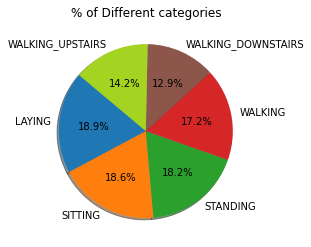

In [ ]:
activity = df['Activity'].groupby(df['Activity']).count().index
activity_data = df['Activity'].groupby(df['Activity']).count().values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#a4d321"]
plt.pie(activity_data, labels=activity,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

In [ ]:
x = df.drop(['Activity', 'subject'],axis=1)
y = df['Activity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    RidgeClassifier(),
    LogisticRegression(max_iter=200)
]

In [ ]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

In [ ]:
f_score(X_train, X_test, y_train, y_test)

Score: 0.861 	 Time(in secs): 12.763 	 Classifier: KNeighborsClassifier
Score: 0.905 	 Time(in secs): 28.194 	 Classifier: SVC
Score: 0.955 	 Time(in secs): 4.768 	 Classifier: DecisionTreeClassifier
Score: 0.983 	 Time(in secs): 11.296 	 Classifier: RandomForestClassifier
Score: 0.749 	 Time(in secs): 0.134 	 Classifier: GaussianNB
Score: 0.982 	 Time(in secs): 0.231 	 Classifier: RidgeClassifier
Score: 0.983 	 Time(in secs): 5.979 	 Classifier: LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
f_score(X_train, X_test, y_train, y_test)

Score: 0.848 	 Time(in secs): 9.883 	 Classifier: KNeighborsClassifier
Score: 0.9 	 Time(in secs): 29.696 	 Classifier: SVC
Score: 0.953 	 Time(in secs): 4.834 	 Classifier: DecisionTreeClassifier
Score: 0.986 	 Time(in secs): 10.932 	 Classifier: RandomForestClassifier
Score: 0.749 	 Time(in secs): 0.147 	 Classifier: GaussianNB
Score: 0.982 	 Time(in secs): 0.285 	 Classifier: RidgeClassifier
Score: 0.984 	 Time(in secs): 6.26 	 Classifier: LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
estimators = [
        ('RFC' ,RandomForestClassifier(n_estimators=500, random_state = 42)),
        ('KNC', KNeighborsClassifier(5)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', SVC(kernel="rbf")),
        ('RC',  RidgeClassifier()),
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier()
)

In [ ]:
s = time.time()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
e = time.time()
print(f"time consumed: {round(e-s,3)}")
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

time consumed: 493.313


0.9926337048850736

In [ ]:
s = time.time()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
e = time.time()
print(f"time consumed: {round(e-s,3)}")
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

time consumed: 479.624


0.9911998391525811

In [ ]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9922077922077922

In [103]:
clf = DecisionTreeClassifier()

s = time.time()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
e = time.time()
print(f"time consumed: {round(e-s,3)}")
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

time consumed: 0.091


0.9576823537088229

### Compare datasets

In [ ]:
df = pd.read_csv('final_train.csv', index_col=0)
df.head(3)

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,2.988204,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,2.859864,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...,3.717038,1.851578,-4.07074

In [ ]:
df2 = pd.read_csv('train.csv')
df2.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
df3 = pd.read_csv('test.csv')
df3.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.0,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.0,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.0,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0

In [ ]:
list(set(df.columns.tolist()) - set(df2.columns.tolist()))

['tBodyGyro-low()-Y',
 'energy-mean()',
 'void()',
 'tBodyGyro-low()-X',
 'fBodyAcc-main()-X',
 'fBodyAcc-main()-Z',
 'tBodyGyro-low()-Z',
 'fBodyAcc-main()-Y',
 'shadow-gravity-angle()']

In [ ]:
list(set(df2.columns.tolist()) - set(df.columns.tolist()))

[]

In [ ]:
len_df1 = len(df)
len_df2 = len(df2)
len_df3 = len(df3)

len_df1_no_nan = len(df.dropna(how='any'))

print(f"BHL dataset length {len_df1}")
print(f"BHL no NaN dataset length {len_df1_no_nan}")
print(f"Kaggle train dataset length {len_df2}")
print(f"Kaggle test dataset length {len_df3}")

print(f"Diffrence {len_df1 - len_df2 - len_df3}")
print(f"Diffrence (no NaN) {len_df1_no_nan - len_df2 - len_df3}")

BHL dataset length 11086
BHL no NaN dataset length 9624
Kaggle train dataset length 7352
Kaggle test dataset length 2947
Diffrence 787
Diffrence (no NaN) -675


In [ ]:
df3.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,-0.303028,-0.574975,0.529679,0.394903,0.607122,-0.563359,-0.838978,-0.904777,-0.876810,-0.701179,-0.642868,-0.664678,-0.093694,-0.105883,-0.142690,-0.124831,0.123073,-0.030495,0.100853,-0.038277,0.045200,0.143128,-0.014339,-0.002145,0.048802,0.029028,-0.092721,-0.108279,-0.207585,0.095198,...,-0.671666,-0.315550,-0.877314,0.160807,-0.262749,-0.567276,-0.707893,-0.717690,-0.696441,-0.754527,-0.897678,-0.707893,-0.898787,-0.727937,-0.047341,-0.880905,-0.029208,-0.290799,-0.601914,-0.780744,-0.791688,-0.774820,-0.806254,-0.869391,-0.780744,-0.943172,-0.775752,-0.248673,-0.902963,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,0.274075,0.253431,0.338503,0.326645,0.271650,0.434127,0.211957,0.125120,0.157134,0.325979,0.362060,0.331992,0.445319,0.423831,0.359451,0.310705,0.247947,0.257935,0.235618,0.246854,0.209876,0.207973,0.217290,0

In [ ]:
df_preprocessed = df.drop(columns=['tBodyGyro-low()-Y',
 'energy-mean()',
 'void()',
 'tBodyGyro-low()-X',
 'fBodyAcc-main()-X',
 'fBodyAcc-main()-Z',
 'tBodyGyro-low()-Z',
 'fBodyAcc-main()-Y',
 'shadow-gravity-angle()'], axis=0).dropna(how='any')

df_preprocessed = df_preprocessed.reindex(sorted(df_preprocessed.columns), axis=1)
df2_preprocessed = pd.concat([df2,df3]).reindex(sorted(df2.columns), axis=1)

assert len(list(set(df_preprocessed.columns.tolist()) - set(df2_preprocessed.columns.tolist()))) == 0

df1_described = df_preprocessed.describe()
df2_described = df2_preprocessed.describe()

df1_described.compare(df2_described)

angle(X,gravityMean)                ... tGravityAccMag-std()              
                      self         other  ...                 self         other
count          9624.000000  10299.000000  ...          9624.000000  10299.000000
mean             -1.566967     -0.496522  ...             0.741315     -0.591225
std               0.009837      0.511158  ...             1.486369      0.429431
min              -1.577122     -1.000000  ...            -4.343592     -1.000000
25%              -1.573354     -0.817288  ...            -0.544652     -0.982182
50%              -1.570925     -0.715631  ...             1.751605     -0.843708
75%              -1.567930     -0.521503  ...             2.029856     -0.242323
max              -1.536682      1.000000  ...             2.114257      1.000000

[8 rows x 1124 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_preprocessed = df.drop(columns=['tBodyGyro-low()-Y',
 'energy-mean()',
 'void()',
 'tBodyGyro-low()-X',
 'fBodyAcc-main()-X',
 'fBodyAcc-main()-Z',
 'tBodyGyro-low()-Z',
 'fBodyAcc-main()-Y',
 'shadow-gravity-angle()'], axis=0).dropna(how='any').drop(['Activity', 'subject'],axis=1)


df_preprocessed = df_preprocessed.reindex(sorted(df_preprocessed.columns), axis=1)
df2_preprocessed = pd.concat([df2,df3]).reindex(sorted(df2.columns), axis=1).drop(['Activity', 'subject'],axis=1)

assert len(list(set(df_preprocessed.columns.tolist()) - set(df2_preprocessed.columns.tolist()))) == 0

scaler = MinMaxScaler(feature_range=(-1,1))

data = scaler.fit_transform(df_preprocessed)

df_preprocessed = pd.DataFrame.from_records(data, columns=df_preprocessed.columns)

df1_described = df_preprocessed.describe()
df2_described = df2_preprocessed.describe()

df1_described.compare(df2_described)

angle(X,gravityMean)                ... tGravityAccMag-std()              
                      self         other  ...                 self         other
count          9624.000000  10299.000000  ...          9624.000000  10299.000000
mean             -0.497784     -0.496522  ...             0.574799     -0.591225
std               0.486478      0.511158  ...             0.460329      0.429431
min                    NaN           NaN  ...                  NaN           NaN
25%              -0.813643     -0.817288  ...             0.176534     -0.982182
50%              -0.693510     -0.715631  ...             0.887687     -0.843708
75%              -0.545393     -0.521503  ...             0.973861     -0.242323
max                    NaN           NaN  ...                  NaN           NaN

[8 rows x 1122 columns]

### Feature selection

In [105]:
df = pd.read_csv('final_train.csv', index_col=0).dropna(how='any')

X = df.drop(['Activity'],axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = RandomForestClassifier(random_state=0)

s = time.time()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
e = time.time()
print(f"time consumed: {round(e-s,3)}")
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

importance = pd.Series(clf.feature_importances_, index=X.columns)

time consumed: 11.189


Text(0, 0.5, 'Feature')

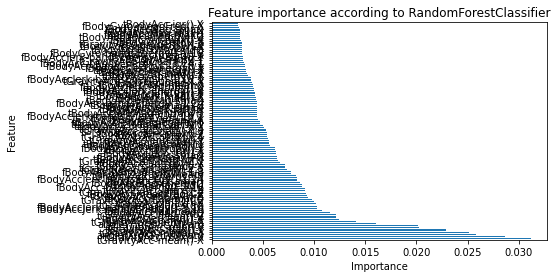

In [108]:
fig = importance.nlargest(100).plot(kind='barh')

fig.set_title("Feature importance according to RandomForestClassifier")
fig.set_xlabel("Importance")
fig.set_ylabel("Feature")

In [109]:
# importance = importance.loc[lambda x : x > 0.01]
importance = importance.nlargest(13)
print(len(importance))
important_columns = importance.sort_values(ascending=False).index.tolist()

df = pd.read_csv('final_train.csv', index_col=0).dropna(how='any')

X2 = df.drop(['Activity'],axis=1)
X2 = X2[important_columns]
y = df['Activity']

print(X2)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)

clf2 = DecisionTreeClassifier(random_state=0)

s = time.time()
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
e = time.time()
print(f"time consumed: {round(e-s,3)}")
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

13
       tGravityAcc-mean()-X  ...  fBodyAccMag-std()
0                  2.246320  ...          -1.000675
1                  2.488702  ...          -2.166122
2                  4.616200  ...          -0.806943
3                  2.254465  ...          -1.633627
5                  2.215603  ...          -1.467383
...                     ...  ...                ...
11080              2.326142  ...          -2.855465
11081              2.488702  ...          -2.166122
11082              4.364465  ...          -1.208579
11083              2.418898  ...          -1.850257
11085              2.287411  ...          -1.771676

[9624 rows x 13 columns]
time consumed: 0.091


0.9555087911293284

In [110]:
print(important_columns)

['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'angle(X,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-min()-Y', 'angle(Y,gravityMean)', 'tGravityAcc-energy()-X', 'tGravityAcc-min()-Z', 'tBodyAccJerk-std()-X', 'tGravityAcc-mean()-Z', 'fBodyAccMag-std()']


## Interpretability and explainability

Rules used to predict sample 1000:

decision node 0 : (X_test[1000, tBodyAccJerk-std()-X] = 5.0725847272277695) <= 5.9768736362457275)
decision node 1 : (X_test[1000, fBodyAccMag-std()] = -2.166122496008363) > -2.559129238128662)
decision node 45 : (X_test[1000, tGravityAcc-min()-X] = -2.1871968493743346) <= -2.1748740673065186)
decision node 46 : (X_test[1000, angle(Y,gravityMean)] = -0.6126200312144867) > -0.6529531180858612)


True

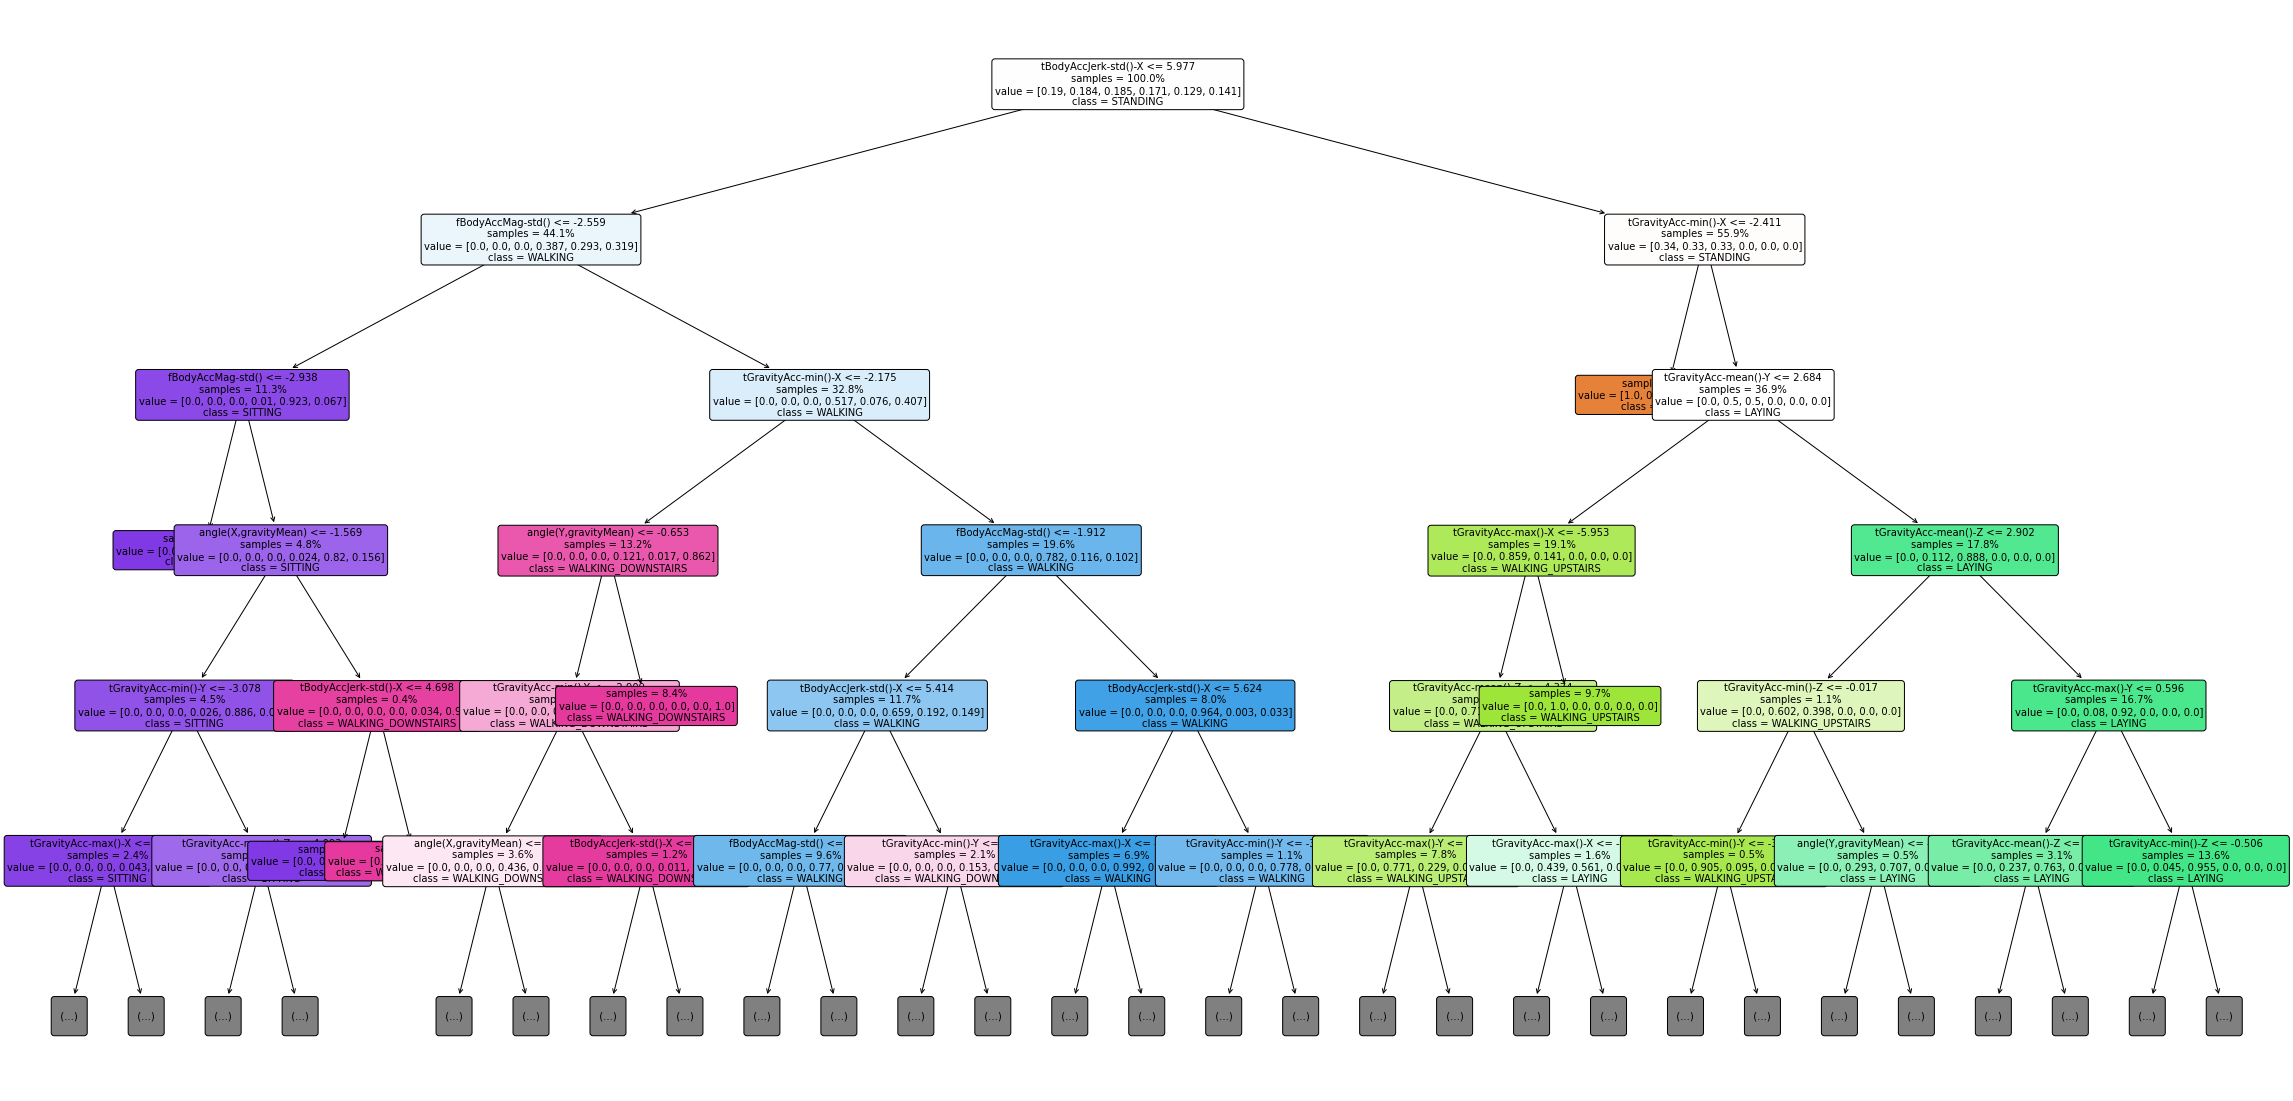

In [112]:
df = pd.read_csv('final_train.csv', index_col=0).dropna(how='any')

X = df.drop(['Activity'],axis=1)
X = X[important_columns]

# X.columns = X.columns.str.replace("\W", "_")

y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=0)

clf.fit(X_train,y_train)

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 1000
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

X_test = X_test.to_numpy()

print('Rules used to predict sample {id}:\n'.format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X_test[{sample}, {feature}] = {value}) "
          "{inequality} {threshold})".format(
              node=node_id,
              sample=sample_id,
              feature=feature_names[feature[node_id]],
              value=X_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id]))
    
feature_names = X2.columns
target_names = y.unique().tolist()

plt.figure(figsize=(40,20))

plot_tree(clf, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          max_depth = 5,
          impurity = False,
          proportion=True,
          fontsize=10,
          rounded = True)

True

In [127]:
import pickle

df = pd.read_csv('final_train.csv', index_col=0)

df_important = df[important_columns+['Activity']]
df_important.dropna(how="any",inplace=True)
y = df_important['Activity']
X = df_important.drop('Activity', axis=1)

# X = df.drop(['Activity'],axis=1)
# X = X[important_columns]

print(len(X.columns))

clf = DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=0)

clf.fit(X,y)

filename = 'model.pickle'
pickle.dump(clf, open(filename, 'wb'))

y_pred = clf2.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


13


0.9555087911293284

In [128]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9963636363636363


In [129]:
print(important_columns)

['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'angle(X,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-min()-Y', 'angle(Y,gravityMean)', 'tGravityAcc-energy()-X', 'tGravityAcc-min()-Z', 'tBodyAccJerk-std()-X', 'tGravityAcc-mean()-Z', 'fBodyAccMag-std()']


In [130]:
!pip install micromlgen
from micromlgen import port

  Created wheel for micromlgen: filename=micromlgen-1.1.23-cp37-none-any.whl size=29095 sha256=d7a9b01b934b8ff3d7e14de77278a52c7cf1db550a0705557e5ba396b6c81967
  Stored in directory: /root/.cache/pip/wheels/18/8a/f0/bc837db55f7e6159d94de85c7e3b3dd78db19109f4de268f5f
Successfully built micromlgen


In [131]:
classifier = DecisionTreeClassifier(max_depth=13, criterion='entropy').fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.961038961038961

In [132]:
c_code = port(classifier)
with open("modelDecisionTree.cpp", "w") as file:
    file.write(c_code)